In [1]:
import yt
print(yt.__version__) # 3.6.0 or higher
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

3.6.0


## 2D

In [37]:
datfile = '../Sedov_Taylor_2D/output/sedov_taylor_0055.dat'
ds = yt.load(datfile)

yt : [INFO     ] 2020-12-20 17:02:45,670 Parameters: current_time              = 0.55
yt : [INFO     ] 2020-12-20 17:02:45,671 Parameters: domain_dimensions         = [512 512   1]
yt : [INFO     ] 2020-12-20 17:02:45,671 Parameters: domain_left_edge          = [ 0. -1.  0.]
yt : [INFO     ] 2020-12-20 17:02:45,672 Parameters: domain_right_edge         = [2. 1. 1.]
yt : [INFO     ] 2020-12-20 17:02:45,672 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2020-12-20 17:02:47,067 Using full HD energy for thermal pressure.
yt : [WARNING  ] 2020-12-20 17:02:47,075 In cylindrical geometry, gradient fields may contain artifacts near cartesian axes.
yt : [WARNING  ] 2020-12-20 17:02:47,076 In cylindrical geometry, gradient fields may contain artifacts near cartesian axes.


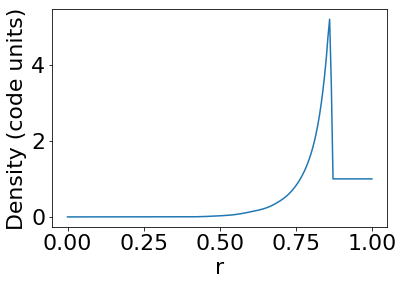

In [38]:
all_data_level_0 = ds.covering_grid(level=0, left_edge=[0, -1, 0], dims=ds.domain_dimensions)
density = np.array([np.squeeze(all_data_level_0['density'])[i, ds.domain_dimensions[0]//2 + i] for i in range(int(2**-.5 * ds.domain_dimensions[0]/2))])


plt.plot(np.linspace(0, 1, density.shape[0]), density / ds.unit_registry.lut['code_density'][0])
plt.xlabel('r')
plt.ylabel('Density (code units)')
plt.savefig('512-slice.png', bbox_inches='tight')

yt : [INFO     ] 2020-12-20 16:59:35,444 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2020-12-20 16:59:35,719 Using full HD energy for thermal pressure.
yt : [WARNING  ] 2020-12-20 16:59:35,727 In cylindrical geometry, gradient fields may contain artifacts near cartesian axes.
yt : [WARNING  ] 2020-12-20 16:59:35,728 In cylindrical geometry, gradient fields may contain artifacts near cartesian axes.
yt : [INFO     ] 2020-12-20 16:59:36,094 xlim = 0.000000 2.000000
yt : [INFO     ] 2020-12-20 16:59:36,094 ylim = -1.000000 1.000000
yt : [INFO     ] 2020-12-20 16:59:36,096 xlim = 0.000000 2.000000
yt : [INFO     ] 2020-12-20 16:59:36,097 ylim = -1.000000 1.000000
yt : [INFO     ] 2020-12-20 16:59:36,099 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



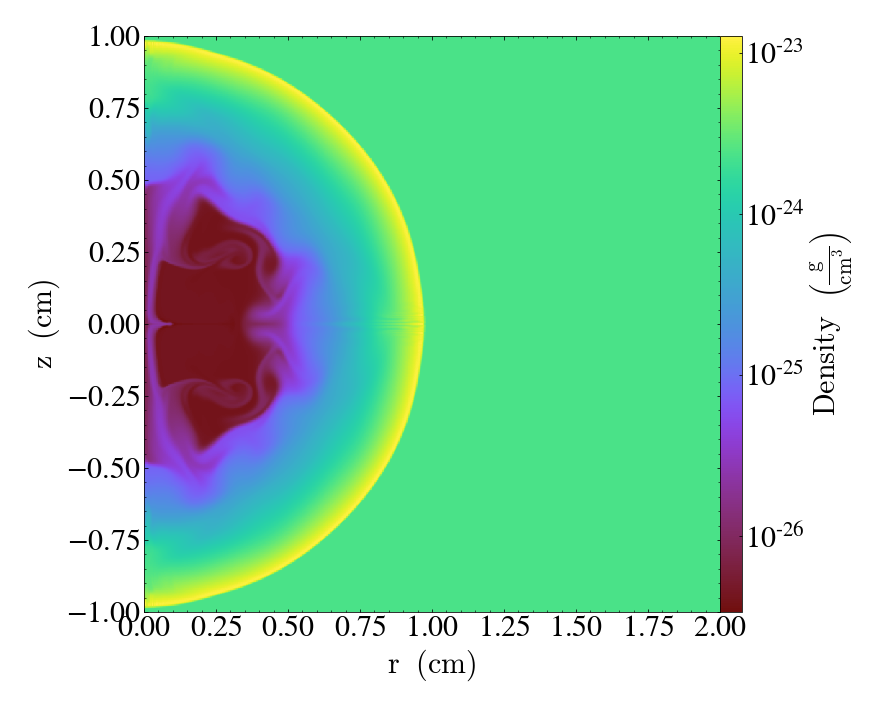

yt : [INFO     ] 2020-12-20 16:59:37,001 Saving plot amr-dens.png


['amr-dens.png']

In [28]:
datfile = '../Sedov_Taylor_2D/output_amr/sedov_taylor_0055.dat'
ds = yt.load(datfile)
p = yt.plot_2d(ds, 'density', fontsize=30)
p.show()
p.save('amr-dens.png')